<a href="https://colab.research.google.com/github/SSrishti-14/AI_Lab/blob/main/2205335_AILab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Path: [1, 2, 6, 10, 11, 12], Cost: 13


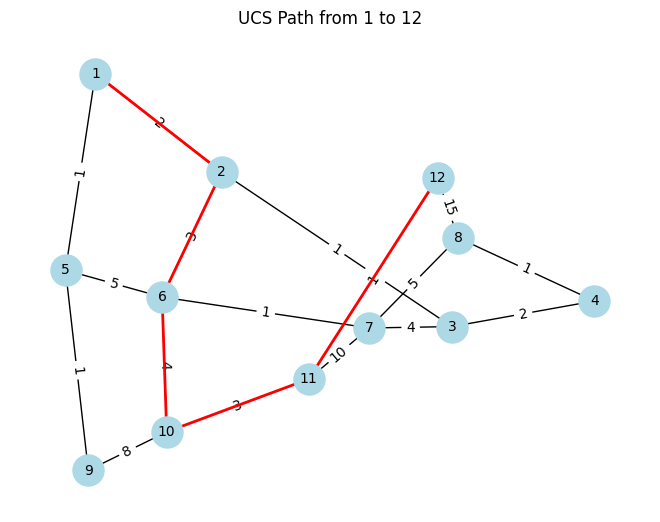

In [ ]:
import time
import networkx as nx
import matplotlib.pyplot as plt
edges = [
    (1,2,2), (1,5,1), (2,3,1), (2,6,3), (3,4,2), (4,8,1), (5,9,1), (6,5,5), (6,7,1), (6,10,4), (7,11,10), (8,7,5),
    (8,12,15), (9,10,8), (10,11,3), (11,12,1), (7,3,4)
]
def build_graph(edge_list):
    graph = {}
    for u, v, w in edge_list:
        graph.setdefault(u, []).append((v, w))
        graph.setdefault(v, []).append((u, w))
    return graph
def draw_graph_with_path(edges, path, title):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="r", width=2)
    plt.title(title)
    plt.show()
import heapq

def ucs(graph, start, goal):
    queue = [(0, start, [start])]
    visited = set()
    while queue:
        cost, node, path = heapq.heappop(queue)
        if node in visited:
            continue
        visited.add(node)
        if node == goal:
            return path, cost
        for neighbor, weight in graph.get(node, []):
            if neighbor not in visited:
                heapq.heappush(queue, (cost + weight, neighbor, path + [neighbor]))
    return None, float('inf')
graph = build_graph(edges)

path, cost = ucs(graph, 1, 12)
print(f"Path: {path}, Cost: {cost}")

draw_graph_with_path(edges, path, "UCS Path from 1 to 12")


Shortest path: [1, 2, 6, 10, 11, 12]
Total cost: 13


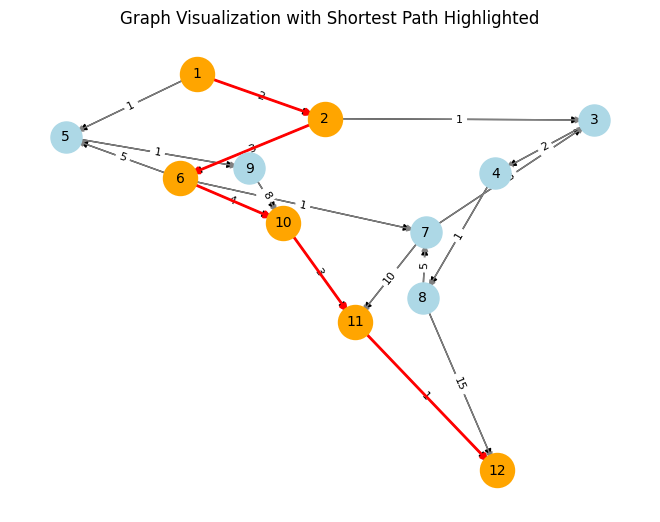

In [ ]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def a_star(graph, heuristics, start, goal):
    # Priority queue to store (f_cost, g_cost, current_node, path)
    priority_queue = []
    heapq.heappush(priority_queue, (0 + heuristics[start], 0, start, [start]))
    visited = set()

    while priority_queue:
        # Get the node with the lowest f_cost
        f_cost, g_cost, current_node, path = heapq.heappop(priority_queue)

        # If goal is reached, return the path and cost
        if current_node == goal:
            return path, g_cost

        # Skip if the node is already visited
        if current_node in visited:
            continue
        visited.add(current_node)

        # Explore neighbors
        for neighbor, weight in graph.get(current_node, []):
            if neighbor not in visited:
                # Calculate g_cost and f_cost
                new_g_cost = g_cost + weight
                new_f_cost = new_g_cost + heuristics[neighbor]
                heapq.heappush(priority_queue, (new_f_cost, new_g_cost, neighbor, path + [neighbor]))

    return None, float('inf')  # If no path is found

# Define the graph as an adjacency list with edge weights
graph = {
    1: [(2, 2), (5, 1)],
    2: [(3, 1), (6, 3)],
    3: [(4, 2)],
    4: [(8, 1)],
    5: [(9, 1)],
    6: [(5, 5), (7, 1), (10, 4)],
    7: [(11, 10), (3, 3)],
    8: [(7, 5), (12, 15)],
    9: [(10, 8)],
    10: [(11, 3)],
    11: [(12, 1)],
}

# Define the heuristic values for each node
heuristics = {
    1: 12, 2: 10, 3: 16, 4: 15,
    5: 12, 6: 7, 7: 11, 8: 15,
    9: 8, 10: 4, 11: 1, 12: 0
}

# Starting and goal nodes
start_node = 1
goal_node = 12

# Run A* algorithm
path, cost = a_star(graph, heuristics, start_node, goal_node)

# Display the result
print("Shortest path:", path)
print("Total cost:", cost)

# Visualize the graph
def visualize_graph(graph, path):
    G = nx.DiGraph()
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)  # Generate positions for nodes

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
    nx.draw_networkx_edges(G, pos, edge_color="gray")

    # Draw edges and nodes in the shortest path
    edge_labels = {(u, v): d["weight"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    path_edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
    nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="orange", node_size=600)

    plt.title("Graph Visualization with Shortest Path Highlighted")
    plt.show()

# Call the visualization function
visualize_graph(graph, path)
